Below is a succinct example you could demonstrate in class or include in a Jupyter Notebook to illustrate a few advanced statistical methods. It covers:  
• Generating a synthetic dataset  
• Performing exploratory correlation analysis  
• Conducting a t-test and an ANOVA  
• Running a simple linear regression with Statsmodels  

You can adapt and expand on this foundation to show more complex techniques such as multiple regression, logistic regression, or PCA.

--------------------------------------------------------------------------------
# Advanced Statistical Methods: Companion Demo

In [5]:
# Jupyter Notebook / Python Demo

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For statistical tests
from scipy.stats import ttest_ind, f_oneway

# For regression with Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Generate a Synthetic Dataset

np.random.seed(42)
num_samples = 150

# Let's create some variables that have interesting relationships
age = np.random.randint(20, 60, num_samples)        # Age between 20 and 60
salary = age * 1200 + np.random.normal(0, 5000, num_samples)  # Salary depends on age + noise
education_years = np.random.choice([12, 14, 16, 18], size=num_samples)  # Discrete levels
performance_score = 0.5 * salary + 10 * education_years + np.random.normal(0, 2000, num_samples)

# Create a 'Region' categorical variable (to show group-based comparisons)
region = np.random.choice(['North', 'South', 'East'], size=num_samples, p=[0.4, 0.3, 0.3])

# Combine into a DataFrame
df = pd.DataFrame({
    'age': age,
    'education_years': education_years,
    'salary': salary,
    'performance_score': performance_score,
    'region': region
})

# Quick peek
print("Head of the DataFrame:")
display(df.head())


Head of the DataFrame:


,age,education_years,salary,performance_score,region
0,58,14,68309.076007,34396.025921,East
1,48,16,59904.778077,31101.588822,South
2,34,14,34053.050134,20523.136087,East
3,27,12,27304.636073,10023.380287,East
4,40,14,48635.061197,27679.171217,North



Correlation Matrix:


,age,education_years,salary,performance_score
age,1.000000,-0.119020,0.934948,0.915484
education_years,-0.119020,1.000000,-0.090417,-0.104199
salary,0.934948,-0.090417,1.000000,0.958510
performance_score,0.915484,-0.104199,0.958510,1.000000


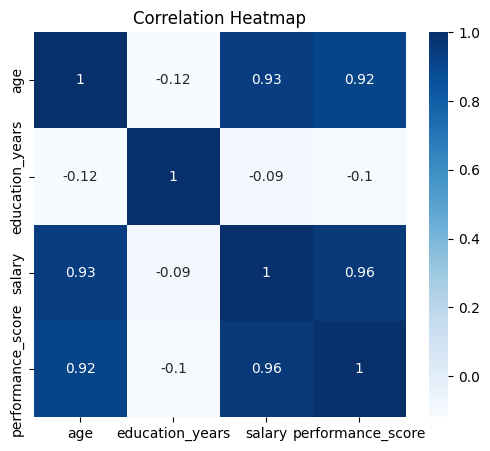

In [6]:

# 2. Exploratory Analysis & Correlation Matrix

corr_matrix = df[['age','education_years','salary','performance_score']].corr()
print("\nCorrelation Matrix:")
display(corr_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [7]:

# Observations:
#  - We might expect 'salary' and 'performance_score' to be somewhat correlated.
#  - education_years could also correlate with performance_score.

# 3. T-test (Comparing Two Regions on Salary)
#    Let's compare the average salary in 'North' vs. 'South' regions.

north_salaries = df.loc[df['region'] == 'North', 'salary']
south_salaries = df.loc[df['region'] == 'South', 'salary']

tstat, pval = ttest_ind(north_salaries, south_salaries, equal_var=False)
print("\nT-test: North vs South Salaries")
print(f"T-statistic = {tstat:0.3f}, p-value = {pval:0.3f}")

# Interpretation:
# - If p-value < 0.05: There is a significant difference in salaries between North and South regions
# - If p-value >= 0.05: No significant evidence of salary differences between North and South regions

# For reference:
# - T-statistic measures the standardized difference between group means
# - Higher absolute t-value suggests stronger evidence of difference between groups




T-test: North vs South Salaries
T-statistic = -0.717, p-value = 0.475


In [8]:

# 4. ANOVA (Comparing Salary Across All Three Regions)

north = df.loc[df['region'] == 'North', 'salary']
south = df.loc[df['region'] == 'South', 'salary']
east  = df.loc[df['region'] == 'East',  'salary']

fstat, pval_anova = f_oneway(north, south, east)
print("\nANOVA on Salary by Region")
print(f"F-statistic = {fstat:0.3f}, p-value = {pval_anova:0.3f}")

# Interpretation:
# - If p-value < 0.05: There are significant differences in salaries between regions
# - If p-value >= 0.05: No significant evidence of salary differences between regions

# For reference:
# - F-statistic measures the ratio of variance between groups to variance within groups
# - Higher F-statistic suggests stronger evidence of differences between groups





ANOVA on Salary by Region
F-statistic = 0.239, p-value = 0.788


In [9]:

# 5. Simple Linear Regression: Performance_Score ~ Salary + Education_Years

# We can use Statsmodels' formula API to keep it readable:
model = smf.ols(formula="performance_score ~ salary + education_years", data=df)
results = model.fit()

print("\nRegression: performance_score ~ salary + education_years")
print(results.summary())

# Interpretation:
# - coefficient for salary: effect of each 1 unit of salary on performance_score
# - coefficient for education_years: effect of each additional year of education
# - R-squared: how much variance is explained by the model



Regression: performance_score ~ salary + education_years
                            OLS Regression Results                            
Dep. Variable:      performance_score   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     834.5
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           5.66e-81
Time:                        10:11:38   Log-Likelihood:                -1361.7
No. Observations:                 150   AIC:                             2729.
Df Residuals:                     147   BIC:                             2738.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:

# 6. Visualization of Regression (Optional)
#   Let's do a quick partial plot of performance_score vs. salary (color by education_years).

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='salary', y='performance_score',
                hue='education_years', palette='viridis', alpha=0.7)
plt.title('Performance vs. Salary by Education Level')
plt.show()

"""
Key Talking Points:
------------------
• Correlation Heatmap: Distinguish variables with strong or weak linear relationships.
• T-test: Basic comparison of one numeric variable (salary) between two groups (region).
• ANOVA: Extension to compare multiple groups simultaneously on salary.
• Regression: Evaluate how salary and education influence performance scores.
• Next Steps: Expand on multiple regression, logistic regression, or advanced methods like PCA, 
  time-series modeling, or non-parametric tests, depending on your dataset and research questions.
"""

--------------------------------------------------------------------------------

### How to Use This Demo
1. Copy the code into a Jupyter Notebook (.ipynb) cell or a .py script.  
2. Run it step by step to illustrate how advanced statistical methods are approached in Python.  
3. Invite students to modify the dataset (e.g., sample size, distributions, additional variables) or add their own real dataset to see how the methods behave.  
4. Discuss each output, highlighting the interpretation of statistical results (p-values, coefficients, correlation strengths) and potential pitfalls.

This example provides a practical walkthrough of several commonly used methods—t-tests, ANOVA, and linear regression—while setting the stage for more complex techniques (like multiple or logistic regression) that can be introduced later in the syllabus.